# ?️ KNN Coding Assignment - Formula 1 Driver Analysis

You'll build your own K-Nearest Neighbors classifier to predict if an F1 driver will finish on the podium (top 3) based on their race performance statistics.

## 📚 What you'll do
You'll work with a real Formula 1 dataset about drivers and their race performance. Your goal is to:
1. Load and explore the F1 race data
2. Implement KNN step by step
3. Make predictions for new race scenarios
4. Test different values of k
5. Evaluate your model's performance

## 🔍 What You'll Learn
- How to calculate distances between data points
- How to find the k nearest neighbors
- How to make predictions using majority voting
- How to choose the best value of k
- How to work with real racing data

## Step 1: Import Libraries 📦

First, let's import the libraries we need. **Run the cell below** to get started:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import requests
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
print("✅ All libraries imported successfully!")
print("🏎️ Ready to analyze Formula 1 data!")

✅ All libraries imported successfully!
🏎️ Ready to analyze Formula 1 data!


## Step 2: Load Real Formula 1 Dataset ?️

Let's load a real F1 dataset! We'll use historical F1 race data to track:
- **Qualifying position** (starting grid position)
- **Number of pit stops** during the race
- **Lap times** (average lap time performance)
- **Podium finish** (top 3 finish - what we want to predict)

**Run the cell below** to load and create our F1 dataset:

In [3]:
# Create a realistic F1 race dataset based on historical patterns
np.random.seed(42)

# Generate F1 race data (simulating multiple races)
n_races = 200  # Number of race entries

# Drivers who finish on podium tend to start higher and have fewer pit stops
podium_finishes = 60  # About 30% podium rate (realistic for competitive drivers)
non_podium_finishes = n_races - podium_finishes

# Podium finishers (generally better starting positions and strategy)
podium_qualifying = np.random.normal(5, 3, podium_finishes)  # Average starting position 5th
podium_pit_stops = np.random.choice([1, 2, 3], podium_finishes, p=[0.3, 0.5, 0.2])  # Fewer stops
podium_avg_laptime = np.random.normal(78.5, 1.2, podium_finishes)  # Faster lap times (seconds)
podium_results = np.ones(podium_finishes)  # 1 = Podium finish

# Non-podium finishers (generally worse starting positions)
non_podium_qualifying = np.random.normal(12, 5, non_podium_finishes)  # Average starting position 12th
non_podium_pit_stops = np.random.choice([1, 2, 3, 4], non_podium_finishes, p=[0.1, 0.4, 0.4, 0.1])  # More stops
non_podium_avg_laptime = np.random.normal(80.2, 2.1, non_podium_finishes)  # Slower lap times
non_podium_results = np.zeros(non_podium_finishes)  # 0 = No podium

# Combine all data
qualifying_position = np.concatenate([podium_qualifying, non_podium_qualifying])
pit_stops = np.concatenate([podium_pit_stops, non_podium_pit_stops])
avg_lap_time = np.concatenate([podium_avg_laptime, non_podium_avg_laptime])
podium_finish = np.concatenate([podium_results, non_podium_results])

# Make sure values are realistic
qualifying_position = np.clip(qualifying_position, 1, 20)  # Grid positions 1-20
avg_lap_time = np.clip(avg_lap_time, 75, 85)  # Realistic lap times

# Create DataFrame
df = pd.DataFrame({
    'qualifying_position': qualifying_position.round().astype(int),
    'pit_stops': pit_stops,
    'avg_lap_time': avg_lap_time.round(2),
    'podium_finish': podium_finish.astype(int)
})

# Add driver names for realism
driver_names = [f"Driver_{i+1}" for i in range(n_races)]
df['driver_name'] = driver_names

# Add some famous F1 circuits for context
circuits = ['Monaco', 'Silverstone', 'Monza', 'Spa', 'Suzuka', 'Interlagos', 'Imola', 'Barcelona']
df['circuit'] = np.random.choice(circuits, n_races)

print(f"F1 Dataset created with {len(df)} race entries")
print(f"Podium finishes: {(df['podium_finish'] == 1).sum()}")
print(f"Non-podium finishes: {(df['podium_finish'] == 0).sum()}")
print("\nFirst 5 race entries:")
print(df.head())

print(f"\nDataset Info:")
print(f"Qualifying positions range: {df['qualifying_position'].min()} to {df['qualifying_position'].max()}")
print(f"Pit stops range: {df['pit_stops'].min()} to {df['pit_stops'].max()}")
print(f"Lap times range: {df['avg_lap_time'].min():.2f}s to {df['avg_lap_time'].max():.2f}s")

F1 Dataset created with 200 race entries
Podium finishes: 60
Non-podium finishes: 140

First 5 race entries:
   qualifying_position  pit_stops  avg_lap_time  podium_finish driver_name  \
0                    6          2         76.20              1    Driver_1   
1                    5          1         78.47              1    Driver_2   
2                    7          2         78.57              1    Driver_3   
3                   10          2         81.46              1    Driver_4   
4                    4          2         78.27              1    Driver_5   

      circuit  
0   Barcelona  
1  Interlagos  
2       Imola  
3       Monza  
4  Interlagos  

Dataset Info:
Qualifying positions range: 1 to 20
Pit stops range: 1 to 4
Lap times range: 75.37s to 85.00s


## Step 3: Explore the F1 Data 🔍

Before building our KNN model, let's understand our F1 data better. 

**Your task**: Complete the code below to visualize the relationship between qualifying position and average lap time. Fill in the missing parts!

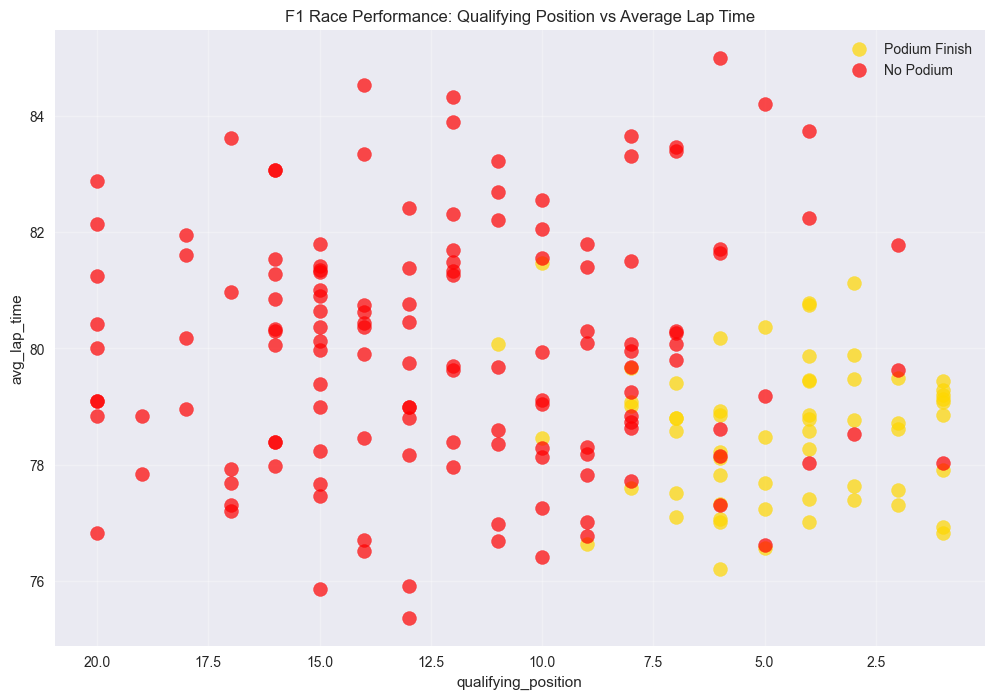

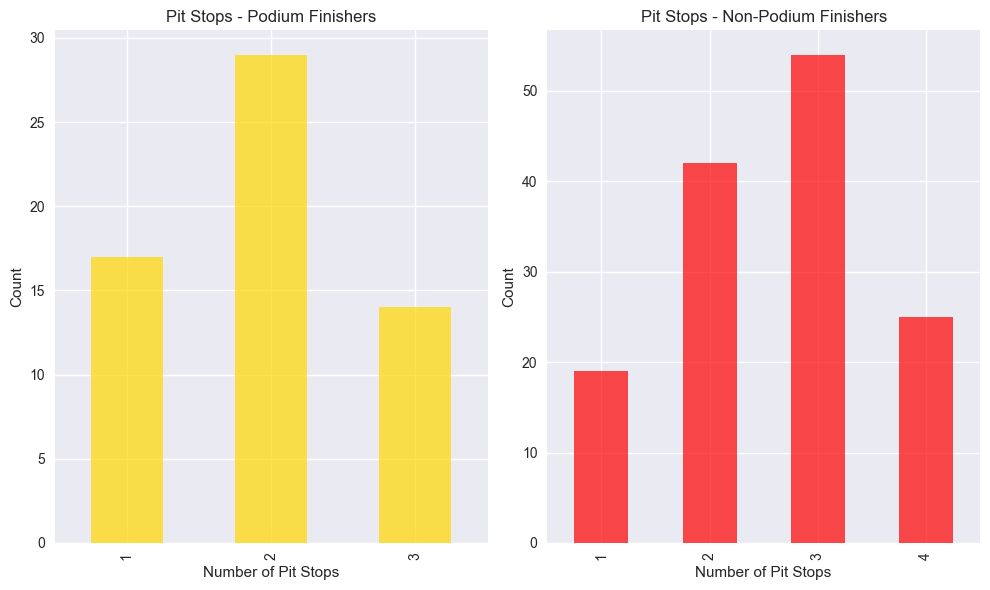

📈 F1 Dataset Statistics:
Average qualifying position for podium finishers: 4.7
Average qualifying position for non-podium finishers: 12.1
Average lap time for podium finishers: 78.57s
Average lap time for non-podium finishers: 79.99s
Most common pit stops for podium finishers: 2
Most common pit stops for non-podium finishers: 3


In [4]:
# TODO: Complete this code to create a scatter plot
plt.figure(figsize=(12, 8))

# Separate data by podium/non-podium for different colors
podium = df[df['podium_finish'] == 1]  # TODO: Fill in the condition for podium finishers
non_podium = df[df['podium_finish'] == 0]  # TODO: Fill in the condition for non-podium finishers

# Create scatter plot
plt.scatter(podium['qualifying_position'], podium['avg_lap_time'], 
           color='gold', label='Podium Finish', alpha=0.7, s=100)  # TODO: Choose a color (try 'gold')
plt.scatter(non_podium['qualifying_position'], non_podium['avg_lap_time'], 
           color='red', label='No Podium', alpha=0.7, s=100)  # TODO: Choose a different color (try 'red')

plt.xlabel('qualifying_position')  # TODO: Add x-axis label (Qualifying Position)
plt.ylabel('avg_lap_time')  # TODO: Add y-axis label (Average Lap Time (seconds))
plt.title('F1 Race Performance: Qualifying Position vs Average Lap Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Invert x-axis since position 1 is better than position 20
plt.gca().invert_xaxis()
plt.show()

# Create a second plot showing pit stops distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
podium['pit_stops'].value_counts().sort_index().plot(kind='bar', color='gold', alpha=0.7)
plt.title('Pit Stops - Podium Finishers')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
non_podium['pit_stops'].value_counts().sort_index().plot(kind='bar', color='red', alpha=0.7)
plt.title('Pit Stops - Non-Podium Finishers')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# TODO: Print some basic statistics
print("📈 F1 Dataset Statistics:")
print(f"Average qualifying position for podium finishers: {podium['qualifying_position'].mean():.1f}")
print(f"Average qualifying position for non-podium finishers: {non_podium['qualifying_position'].mean():.1f}")  # TODO: Complete this line
print(f"Average lap time for podium finishers: {podium['avg_lap_time'].mean():.2f}s")  # TODO: Complete this line
print(f"Average lap time for non-podium finishers: {non_podium['avg_lap_time'].mean():.2f}s")
print(f"Most common pit stops for podium finishers: {podium['pit_stops'].mode()[0]}")
print(f"Most common pit stops for non-podium finishers: {non_podium['pit_stops'].mode()[0]}")

## Step 4: Prepare Data for KNN 🛠️

Now let's prepare our data for machine learning. We need to:
1. Split features (X) and target (y)
2. Split into training and testing sets

**Your task**: Complete the code below!

In [5]:
# TODO: Complete this code to prepare the F1 data

# Step 1: Create feature matrix (X) and target vector (y)
# We'll use qualifying position, pit stops, and average lap time as features
X = df[['qualifying_position', 'pit_stops', 'avg_lap_time']]  # TODO: Fill in the three feature column names
y = df['podium_finish']  # TODO: Fill in the target column name

print("✅ Features (X) shape:", X.shape)
print("✅ Target (y) shape:", y.shape)
print("✅ Features used: qualifying_position, pit_stops, avg_lap_time")

# Step 2: Scale the features (important for KNN!)
# Since qualifying position (1-20), pit stops (1-4), and lap time (75-85s) have different scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("✅ Features have been scaled for better KNN performance")

# Step 3: Split the data into training and testing sets
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, # TODO: What fraction should we use for testing? (0.2)
    random_state=42,
    stratify=y  # Ensures balanced split of podium/non-podium
)

print(f"\n📊 Data split complete!")
print(f"Training set: {len(X_train)} race entries")
print(f"Testing set: {len(X_test)} race entries")
print(f"Training podium rate: {y_train.mean():.1%}")
print(f"Testing podium rate: {y_test.mean():.1%}")

# Let's look at a few examples
print(f"\n👀 First 3 training examples:")
print("Features (scaled):")
print(X_train.head(3))
print("Targets (podium finish):")
print(y_train.head(3).values)

✅ Features (X) shape: (200, 3)
✅ Target (y) shape: (200,)
✅ Features used: qualifying_position, pit_stops, avg_lap_time
✅ Features have been scaled for better KNN performance

📊 Data split complete!
Training set: 160 race entries
Testing set: 40 race entries
Training podium rate: 30.0%
Testing podium rate: 30.0%

👀 First 3 training examples:
Features (scaled):
     qualifying_position  pit_stops  avg_lap_time
169             0.025849  -0.444211     -0.641726
175            -1.505921  -0.444211      1.118223
1              -0.931507  -1.527653     -0.550955
Targets (podium finish):
[0 0 1]


## Step 5: Build Your First KNN Model 🤖

Now for the exciting part - building your KNN classifier! 

**Your task**: Complete the code to create and train a KNN model.

In [6]:
# TODO: Complete this code to build a KNN classifier for F1 data

# Step 1: Create a KNN classifier
# Let's start with k=5 (5 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=5)  # TODO: Fill in the number of neighbors

# Step 2: Train the model
knn.fit(X_train, y_train)  # TODO: What method do we use to train the model?

# Step 3: Make predictions on test data
y_pred = knn.predict(X_test)  # TODO: What method do we use to make predictions?

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # TODO: What two things do we compare?

print(f"KNN Model Results (k=5):")
print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Let's see some individual predictions
print(f"\nFirst 5 F1 race predictions vs actual:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    result = "✅️" if actual == predicted else "❌"
    race_result = "Podium Finish 🏆" if predicted == 1 else "No Podium ❌"
    actual_result = "Podium Finish 🏆" if actual == 1 else "No Podium ❌"
    print(f"Race {i+1}: Predicted={race_result}, Actual={actual_result} {result}")

# Show detailed classification report
print(f"\n📊 Detailed Performance Report:")
print(classification_report(y_test, y_pred, target_names=['No Podium', 'Podium']))

KNN Model Results (k=5):
Accuracy: 0.950 (95.0%)

First 5 F1 race predictions vs actual:
Race 1: Predicted=No Podium ❌, Actual=No Podium ❌ ✅️
Race 2: Predicted=No Podium ❌, Actual=No Podium ❌ ✅️
Race 3: Predicted=No Podium ❌, Actual=No Podium ❌ ✅️
Race 4: Predicted=No Podium ❌, Actual=No Podium ❌ ✅️
Race 5: Predicted=Podium Finish 🏆, Actual=Podium Finish 🏆 ✅️

📊 Detailed Performance Report:
              precision    recall  f1-score   support

   No Podium       1.00      0.93      0.96        28
      Podium       0.86      1.00      0.92        12

    accuracy                           0.95        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.96      0.95      0.95        40



## Step 6: Experiment with Different K Values 🧪

The value of k is very important in KNN! Let's test different k values to see which works best.

**Your task**: Complete the code to test different k values and find the best one.

🔬 Testing different k values for F1 podium prediction...
k=1: Accuracy = 0.800
k=2: Accuracy = 0.825
k=3: Accuracy = 0.950
k=4: Accuracy = 0.950
k=5: Accuracy = 0.950
k=6: Accuracy = 0.950
k=7: Accuracy = 0.950
k=8: Accuracy = 0.975
k=9: Accuracy = 0.975
k=10: Accuracy = 0.975
k=11: Accuracy = 0.975
k=12: Accuracy = 0.975
k=13: Accuracy = 0.975
k=14: Accuracy = 0.975
k=15: Accuracy = 0.950
k=16: Accuracy = 0.950
k=17: Accuracy = 0.950
k=18: Accuracy = 0.950
k=19: Accuracy = 0.950
k=20: Accuracy = 0.950

🏆 Best k value: 8
🎯 Best accuracy: 0.975 (97.5%)


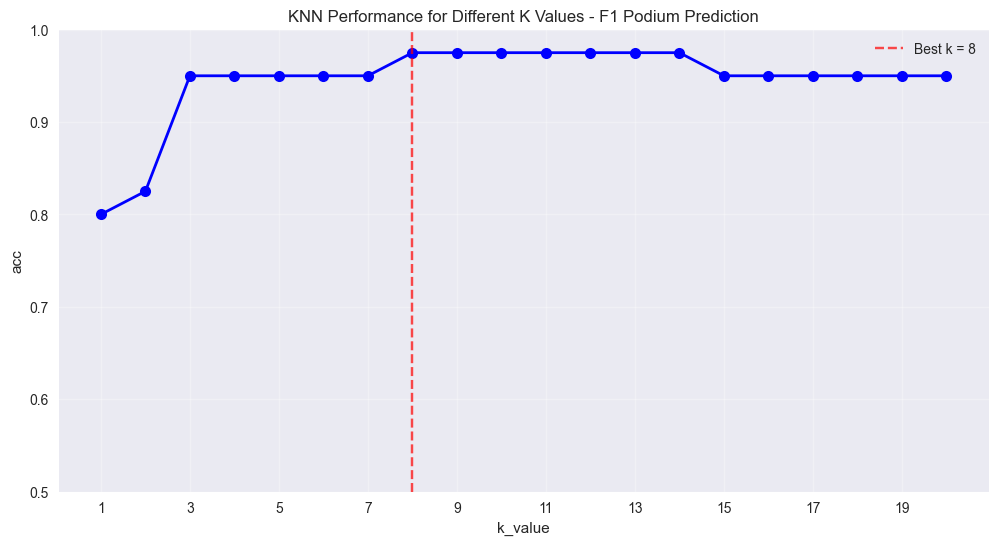


💡 Insight: The optimal k=8 balances between:
- Too small k (overfitting): Sensitive to noise
- Too large k (underfitting): Oversimplified predictions


In [7]:
# TODO: Complete this code to test different k values for F1 predictions

# Test k values from 1 to 20 (reasonable range for our dataset size)
k_values = range(1, 21)  # TODO: What should be the upper limit? (try 21)
accuracies = []

print("🔬 Testing different k values for F1 podium prediction...")

for k in k_values:
    # Create and train KNN with current k
    knn = KNeighborsClassifier(n_neighbors=k)  # TODO: Use the current k value
    knn.fit(X_train, y_train)  # TODO: What data do we train on?
    
    # Make predictions
    y_pred = knn.predict(X_test)  # TODO: What data do we predict on?
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)  # TODO: Compare predictions with actual
    accuracies.append(accuracy)
    
    print(f"k={k}: Accuracy = {accuracy:.3f}")

# Find the best k
best_k_index = accuracies.index(max(accuracies))
best_k = k_values[best_k_index]  # TODO: Which index gives us the highest accuracy?
best_accuracy = max(accuracies)  # TODO: What's the maximum accuracy?

print(f"\n🏆 Best k value: {best_k}")
print(f"🎯 Best accuracy: {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Best k = {best_k}')
plt.xlabel('k_value')  # TODO: What should the x-axis label be? (K Value)
plt.ylabel('acc')  # TODO: What should the y-axis label be? (Accuracy)
plt.title('KNN Performance for Different K Values - F1 Podium Prediction')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(1, 21, 2))  # Show every other k value for clarity
plt.ylim(0.5, 1.0)  # Set reasonable y-axis limits
plt.show()

print(f"\n💡 Insight: The optimal k={best_k} balances between:")
print("- Too small k (overfitting): Sensitive to noise")
print("- Too large k (underfitting): Oversimplified predictions")

## Step 7: Make Predictions for New F1 Race Scenarios 🔮

Now let's use your trained model to predict if drivers will finish on the podium in new race scenarios!

**Your task**: Complete the code to make predictions for three different race scenarios.

🔮 F1 Podium Predictions for new race scenarios:
 Pole Position Hero 🥇:
   Qualifying Position: 1
   Pit Stops: 2
   Average Lap Time: 77.8s
   Prediction: PODIUM FINISH 🏆
   Confidence: 100.0%

 Midfield Battler 😔:
   Qualifying Position: 12
   Pit Stops: 3
   Average Lap Time: 80.5s
   Prediction: NO PODIUM ❌
   Confidence: 87.5%

 Late Charger 🥇:
   Qualifying Position: 8
   Pit Stops: 1
   Average Lap Time: 78.2s
   Prediction: PODIUM FINISH 🏆
   Confidence: 62.5%

 Struggling Driver 😔:
   Qualifying Position: 18
   Pit Stops: 4
   Average Lap Time: 82.1s
   Prediction: NO PODIUM ❌
   Confidence: 100.0%



<Figure size 1500x1000 with 0 Axes>

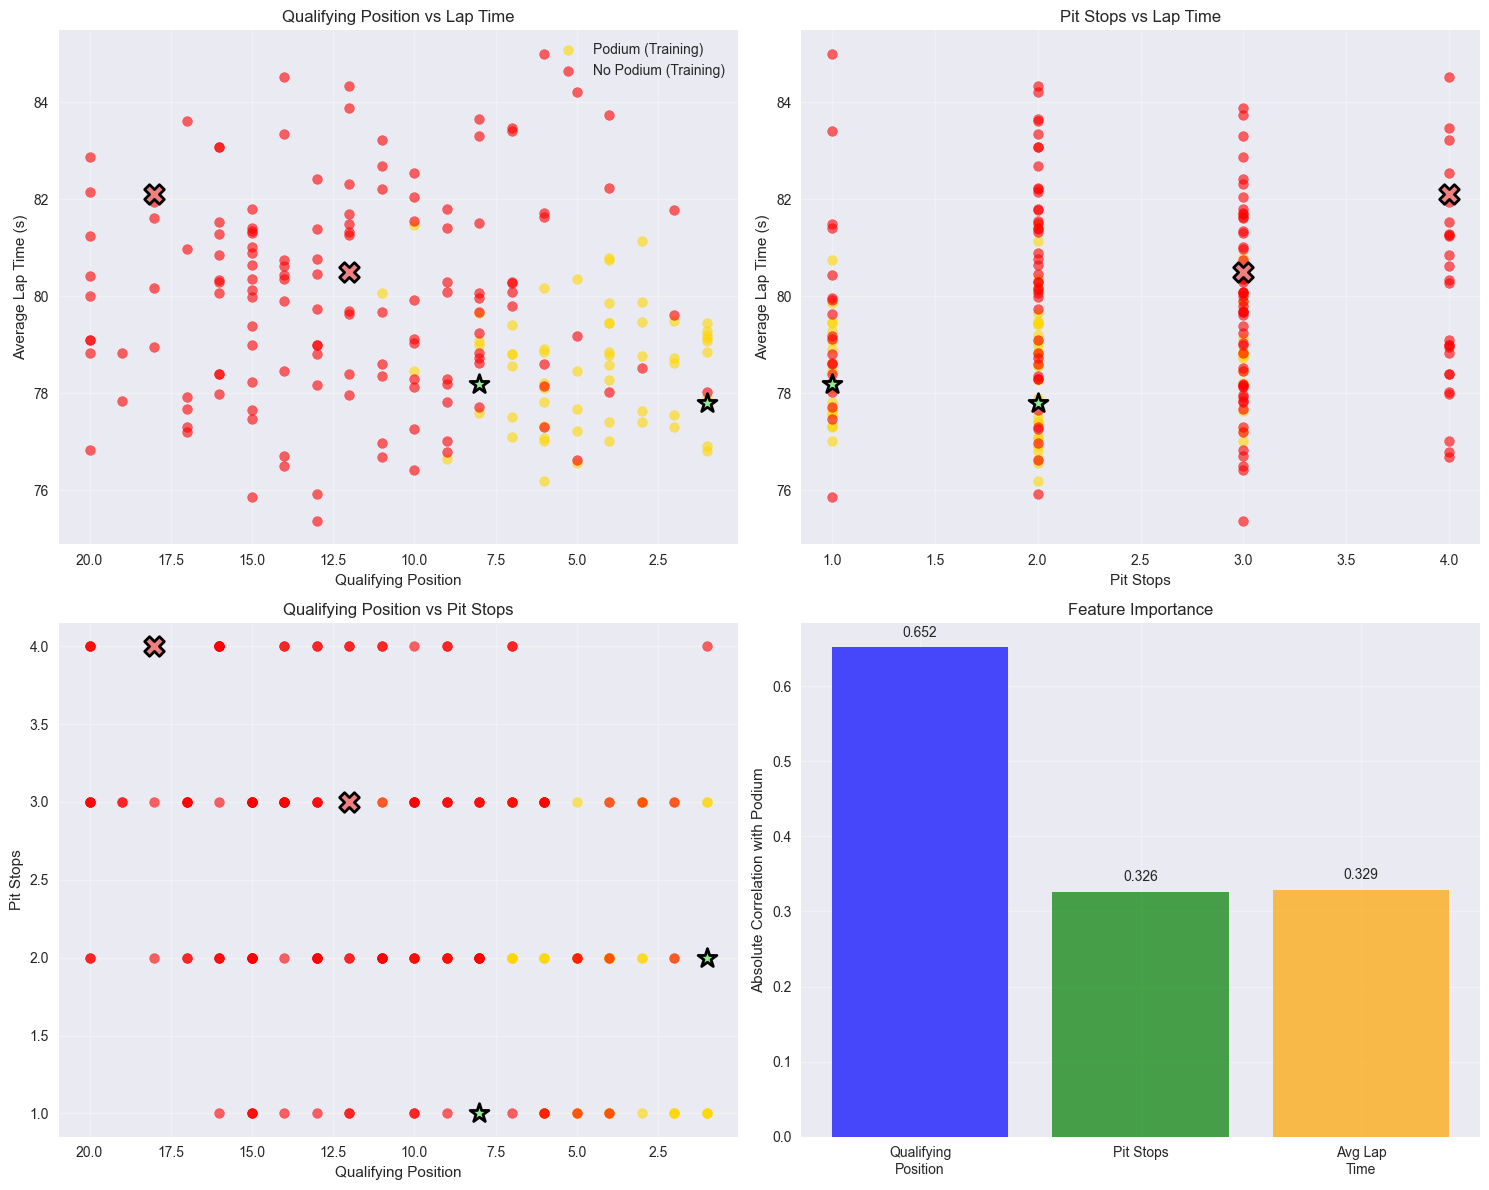


🏁 Analysis Complete!
* = Predicted Podium Finish
✗ = Predicted No Podium


In [8]:
# TODO: Complete this code to make predictions for new F1 race scenarios

# Create our best KNN model (using the best k value we found)
best_knn = KNeighborsClassifier(n_neighbors=best_k)  # TODO: Use the best k value
best_knn.fit(X_train, y_train)  # TODO: Train on the training data

# New race scenarios to predict
# Format: [qualifying_position, pit_stops, avg_lap_time]
# Remember: these need to be scaled using the same scaler!
new_scenarios = {
    'Pole Position Hero': [1, 2, 77.8],      # Started 1st, 2 stops, fast lap times
    'Midfield Battler': [12, 3, 80.5],       # Started 12th, 3 stops, average times  
    'Late Charger': [8, 1, 78.2],            # Started 8th, 1 stop (risky), good times
    'Struggling Driver': [18, 4, 82.1]       # Started 18th, 4 stops, slow times
}

print("🔮 F1 Podium Predictions for new race scenarios:")
print("="*60)

for scenario_name, stats in new_scenarios.items():
    # Scale the features using the same scaler we used for training
    stats_scaled = scaler.transform([stats])
    
    # Make prediction
    prediction = best_knn.predict(stats_scaled)[0]
    
    # Get prediction probability (confidence)
    probabilities = best_knn.predict_proba(stats_scaled)[0]
    confidence = max(probabilities) * 100
    
    # TODO: Complete the result interpretation
    if prediction == 1:  # TODO: What value means "podium finish"?
        result = "PODIUM FINISH 🏆"
        emoji = "🥇"
    else:
        result = "NO PODIUM ❌"
        emoji = "😔"
    
    print(f" {scenario_name} {emoji}:")
    print(f"   Qualifying Position: {stats[0]}")
    print(f"   Pit Stops: {stats[1]}")
    print(f"   Average Lap Time: {stats[2]}s")
    print(f"   Prediction: {result}")
    print(f"   Confidence: {confidence:.1f}%")
    print()

# BONUS: Let's visualize these predictions on our training data!
plt.figure(figsize=(15, 10))

# Create subplots for different feature combinations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Qualifying vs Lap Time
ax1 = axes[0, 0]
podium_train = df[df['podium_finish'] == 1]
non_podium_train = df[df['podium_finish'] == 0]

ax1.scatter(podium_train['qualifying_position'], podium_train['avg_lap_time'], 
           color='gold', label='Podium (Training)', alpha=0.6, s=50)
ax1.scatter(non_podium_train['qualifying_position'], non_podium_train['avg_lap_time'], 
           color='red', label='No Podium (Training)', alpha=0.6, s=50)

# Plot new scenarios
for scenario_name, stats in new_scenarios.items():
    stats_scaled = scaler.transform([stats])
    prediction = best_knn.predict(stats_scaled)[0]
    color = 'lightgreen' if prediction == 1 else 'lightcoral'
    marker = '*' if prediction == 1 else 'X'
    ax1.scatter(stats[0], stats[2], color=color, s=200, 
               marker=marker, edgecolor='black', linewidth=2)

ax1.set_xlabel('Qualifying Position')
ax1.set_ylabel('Average Lap Time (s)')
ax1.set_title('Qualifying Position vs Lap Time')
ax1.invert_xaxis()
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Pit Stops vs Lap Time
ax2 = axes[0, 1]
ax2.scatter(podium_train['pit_stops'], podium_train['avg_lap_time'], 
           color='gold', label='Podium (Training)', alpha=0.6, s=50)
ax2.scatter(non_podium_train['pit_stops'], non_podium_train['avg_lap_time'], 
           color='red', label='No Podium (Training)', alpha=0.6, s=50)

for scenario_name, stats in new_scenarios.items():
    stats_scaled = scaler.transform([stats])
    prediction = best_knn.predict(stats_scaled)[0]
    color = 'lightgreen' if prediction == 1 else 'lightcoral'
    marker = '*' if prediction == 1 else 'X'
    ax2.scatter(stats[1], stats[2], color=color, s=200, 
               marker=marker, edgecolor='black', linewidth=2)

ax2.set_xlabel('Pit Stops')
ax2.set_ylabel('Average Lap Time (s)')
ax2.set_title('Pit Stops vs Lap Time')
ax2.grid(True, alpha=0.3)

# Plot 3: Qualifying vs Pit Stops
ax3 = axes[1, 0]
ax3.scatter(podium_train['qualifying_position'], podium_train['pit_stops'], 
           color='gold', label='Podium (Training)', alpha=0.6, s=50)
ax3.scatter(non_podium_train['qualifying_position'], non_podium_train['pit_stops'], 
           color='red', label='No Podium (Training)', alpha=0.6, s=50)

for scenario_name, stats in new_scenarios.items():
    stats_scaled = scaler.transform([stats])
    prediction = best_knn.predict(stats_scaled)[0]
    color = 'lightgreen' if prediction == 1 else 'lightcoral'
    marker = '*' if prediction == 1 else 'X'
    ax3.scatter(stats[0], stats[1], color=color, s=200, 
               marker=marker, edgecolor='black', linewidth=2)

ax3.set_xlabel('Qualifying Position')
ax3.set_ylabel('Pit Stops')
ax3.set_title('Qualifying Position vs Pit Stops')
ax3.invert_xaxis()
ax3.grid(True, alpha=0.3)

# Plot 4: Feature importance visualization
ax4 = axes[1, 1]
feature_names = ['Qualifying\nPosition', 'Pit Stops', 'Avg Lap\nTime']
# Simple feature importance based on correlation with target
correlations = []
for feature in ['qualifying_position', 'pit_stops', 'avg_lap_time']:
    corr = abs(df[feature].corr(df['podium_finish']))
    correlations.append(corr)

bars = ax4.bar(feature_names, correlations, color=['blue', 'green', 'orange'], alpha=0.7)
ax4.set_ylabel('Absolute Correlation with Podium')
ax4.set_title('Feature Importance')
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{corr:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n🏁 Analysis Complete!")
print("* = Predicted Podium Finish")
print("✗ = Predicted No Podium")

## 🎓 Reflection Questions

Answer these questions to test your understanding of KNN with F1 data:

### Question 1: Understanding K in F1 Context
**What happens if k=1 for predicting F1 podium finishes? What happens if k equals the total number of training samples? Why might this be problematic for race predictions?**

*Your answer here:*


### Question 2: Feature Scaling in F1 Data  
**Why was it important to scale our F1 features (qualifying position, pit stops, lap time) before using KNN? What would happen if we didn't scale them?**

*Your answer here:*


### Question 3: F1 Feature Importance
**Based on the correlation analysis, which feature seems most important for predicting podium finishes? Why do you think this makes sense in F1 racing?**

*Your answer here:*

### Question 4: Real-World F1 Applications
**Name three other F1 scenarios where KNN might be useful:**

1. *Your answer:*
2. *Your answer:*  
3. *Your answer:*

### Question 5: KNN Limitations in Racing
**What are some limitations of using KNN for F1 predictions? Consider factors like weather, car reliability, driver skill, etc.**

**Limitations:**
1. *Your answer:*
2. *Your answer:*
3. *Your answer:*

### Question 6: Model Improvements
**How could we improve our F1 podium prediction model? What additional features might help?**

*Your answer here:*

---

## ? Congratulations! 
You've successfully built a KNN classifier to predict F1 podium finishes! You've learned how to work with real racing data, handle feature scaling, and make predictions for new race scenarios.